In [139]:
import pandas as pd
import numpy as np

In [140]:
df = pd.read_csv("DataPreprocessingGraded_dataset.csv")
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [141]:
df.replace("?" , np.nan , inplace=True)
X,y = df.drop(columns='Target') , df.Target.to_frame()
X,y

(       V1    V2       V3    V4        V5
 0     2.0  50.0  12500.0  98.0  NEGATIVE
 1     0.0  13.0   3250.0  28.0  NEGATIVE
 2     NaN   NaN   4000.0  35.0  NEGATIVE
 3     NaN  20.0   5000.0  45.0  NEGATIVE
 4     1.0  24.0   6000.0  77.0  NEGATIVE
 ..    ...   ...      ...   ...       ...
 743  23.0   2.0    500.0  38.0  NEGATIVE
 744  21.0   2.0    500.0  52.0  NEGATIVE
 745  23.0   3.0    750.0  62.0  NEGATIVE
 746  39.0   1.0    250.0  39.0  NEGATIVE
 747  72.0   1.0    250.0  72.0  NEGATIVE
 
 [748 rows x 5 columns],
     Target
 0      YES
 1      YES
 2      YES
 3      YES
 4       NO
 ..     ...
 743     NO
 744     NO
 745     NO
 746     NO
 747     NO
 
 [748 rows x 1 columns])

#### Q1) How many features remain after applying following pipeline to the feature matrix?
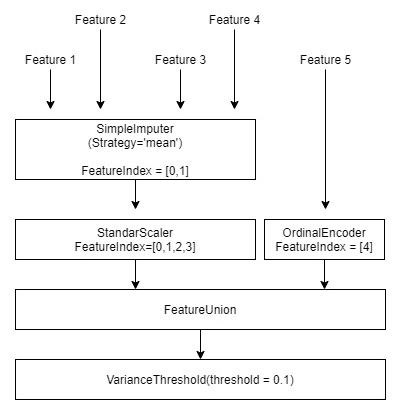

In [142]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold

num_transformer1 = ColumnTransformer(transformers=[
    ("simple_imputer" , SimpleImputer(missing_values=np.nan,strategy="mean") , [0,1]),
] , remainder="passthrough" , verbose_feature_names_out=False).set_output(transform="pandas")

num_transformer2 = ColumnTransformer(transformers=[
    ("standard_scaler" , StandardScaler() , [0,1,2,3]),
],remainder="passthrough" , verbose_feature_names_out=False).set_output(transform="pandas")

cat_transformer = ColumnTransformer(transformers=[
    ("pass" , "passthrough" , [0,1,2,3]),
    ("ordinal_encoder" , OrdinalEncoder() , [4])
],remainder="passthrough" , verbose_feature_names_out=False).set_output(transform="pandas")


full_pipeline = Pipeline(steps=[
    ("impute" , num_transformer1),
    ("scale" , num_transformer2),
    ("encode" , cat_transformer),
    ("variance" , VarianceThreshold(threshold=0.1))
])

full_pipeline.fit_transform(X).shape[1]

4

#### Q2) What are the two most important features computed by RFE?

**Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.**

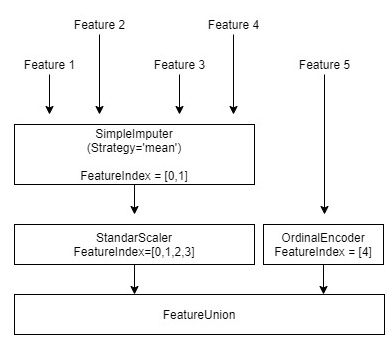

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

full_pipeline = Pipeline(steps=[
    ("impute" , num_transformer1),
    ("scale" , num_transformer2),
    ("encode" , cat_transformer),
])
X = full_pipeline.fit_transform(X)
y = OrdinalEncoder().fit_transform(y).ravel()

estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select = 2, step=1)
selector.fit(X, y)

X.columns[selector.support_]

Index(['V1', 'V3'], dtype='object')

#### Q3) What are the indices of two most important features computed by SFS (forward)?

**Preprocess the data using pipeline shown in the diagram.Use LogisticRegression (with  default parameters) for the estimator. Encode target variable via ordinal encoding.**

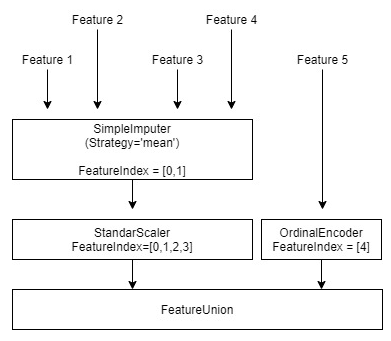

In [144]:
from sklearn.feature_selection import SequentialFeatureSelector

selector = SequentialFeatureSelector(estimator , n_features_to_select=2 , direction='forward')
selector.fit_transform(X,y)

X.columns[selector.support_]

Index(['V2', 'V4'], dtype='object')

#### Q4) What are the indices of two most important features computed by SFS (backward)?

**Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.**

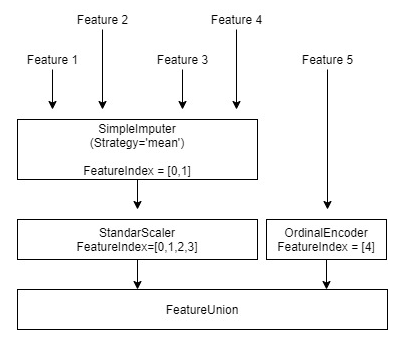

In [145]:
selector = SequentialFeatureSelector(estimator , n_features_to_select=2 , direction='backward')
selector.fit_transform(X,y)

X.columns[selector.support_]

Index(['V3', 'V4'], dtype='object')